IN THIS NOTEBOOK I HAVE MADE AN ATTEMPT TO CLASSIFY THE IMAGES OF THE CIFAR-10 DATASET WHICH HAS ALTOGETHER OF 60000 IMAGES
OF 10 UNIQUE CLASSES NAMELY airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. THE STEPS FOLLOWED 
FOR THE SAME ARE:

1.EXPLORING AND PROCESSING THE DATA
2.CONVERTING ALL THE VALUES FOR THEM TO BE COMPATIBLE WITH THE MODEL
3.BUILDING AND TRAINING THE CONVOLUTIONAL NEURAL NETWORK
4.VISUALISATION OF MODEL METRICS
5.TESTING THE MODEL WITH A SAMPLE IMAGE
    

In [1]:
#IMPORTING ALL REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

In [2]:
#CHECKING THE ACTIVITY OF GPU
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

EXPLORING THE DATA 

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
x_train[1] #we know that images are stored as an array of numbers between 0 to 255

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

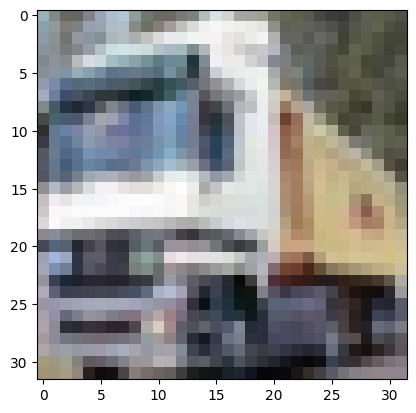

In [11]:
plt.imshow(x_train[1])# to display the image not as the above array, we can use the pyplot function imshow


In [7]:
print(y_train[1])#y_train contains the numbers between 0 to 9 each number corresponds to a label class like dog/airplane

[9]


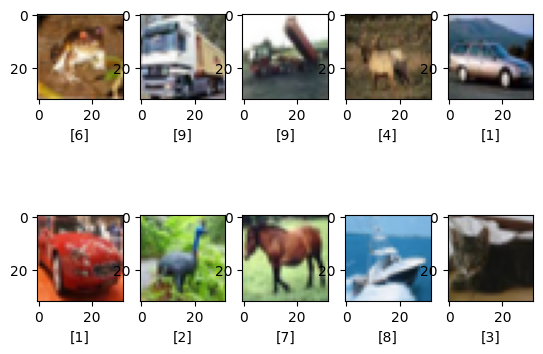

In [12]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
    
    # a few examples of images present in the dataset

WHAT WE REALLY WANT IS THE PROBABILITY OF EACH OF THE 10 DIFFERENT CLASSES. FOR THAT, WE NEED 10 OUTPUT NEURONS IN THE
NEURAL NETWORK. SINCE WE HAVE 10 OUTPUT NEURONS, THE LABELS MUST MATCH THIS AS WELL. TO DO THIS, WE CONVERT THE LABEL 
INTO A SET OF 10 NUMBERS WHERE EACH NUMBER REPRESENTS IF THE IMAGE BELONGS TO THAT CLASS OR NOT. SO IF AN IMAGE BELONGS 
TO THE FIRST CLASS, THE FIRST NUMBER OF THIS SET WILL BE A 1 AND ALL OTHER NUMBERS IN THIS SET WILL BE A 0(EXAMPLE SHOWN
BELOW). TO CONVERT THE LABELS TO ONE-HOT ENCODING, I HAVE USED THE to_categorical FUNCTION

In [103]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)
y_train_one_hot[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [16]:
# all pixel values lie between 0 and 255 hence to get in them in (0,1) range we convert to float divide by 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [17]:
x_train[1]

array([[[0.6039216 , 0.69411767, 0.73333335],
        [0.49411765, 0.5372549 , 0.53333336],
        [0.4117647 , 0.40784314, 0.37254903],
        ...,
        [0.35686275, 0.37254903, 0.2784314 ],
        [0.34117648, 0.3529412 , 0.2784314 ],
        [0.30980393, 0.31764707, 0.27450982]],

       [[0.54901963, 0.627451  , 0.6627451 ],
        [0.5686275 , 0.6       , 0.6039216 ],
        [0.49019608, 0.49019608, 0.4627451 ],
        ...,
        [0.3764706 , 0.3882353 , 0.30588236],
        [0.3019608 , 0.3137255 , 0.24313726],
        [0.2784314 , 0.28627452, 0.23921569]],

       [[0.54901963, 0.60784316, 0.6431373 ],
        [0.54509807, 0.57254905, 0.58431375],
        [0.4509804 , 0.4509804 , 0.4392157 ],
        ...,
        [0.30980393, 0.32156864, 0.2509804 ],
        [0.26666668, 0.27450982, 0.21568628],
        [0.2627451 , 0.27058825, 0.21568628]],

       ...,

       [[0.6862745 , 0.654902  , 0.6509804 ],
        [0.6117647 , 0.6039216 , 0.627451  ],
        [0.6039216 , 0

BUILDING AND TRAINING OUR MODEL - CNN NEURAL NETWORK

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
#filter size is 3x3 and depth is 32,padding is used to keep input and output width,height

In [29]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))


In [30]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 
# to prevent overfitting

In [31]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [32]:
model.add(Flatten())#to convert cube like structure into the straight row
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [34]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 12s 5ms/step - loss: 1.5830 - accuracy: 0.4237 - val_loss: 1.2766 - val_accuracy: 0.5402
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1827 - accuracy: 0.5778 - val_loss: 1.0266 - val_accuracy: 0.6414
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0199 - accuracy: 0.6398 - val_loss: 0.8546 - val_accuracy: 0.6998
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9133 - accuracy: 0.6808 - val_loss: 0.7968 - val_accuracy: 0.7240
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8333 - accuracy: 0.7041 - val_loss: 0.7982 - val_accuracy: 0.7198
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7707 - accuracy: 0.7283 - val_loss: 0.7771 - val_accuracy: 0.7248
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7355 - accuracy: 0.7414 - val_loss: 0.7420 - val_accuracy

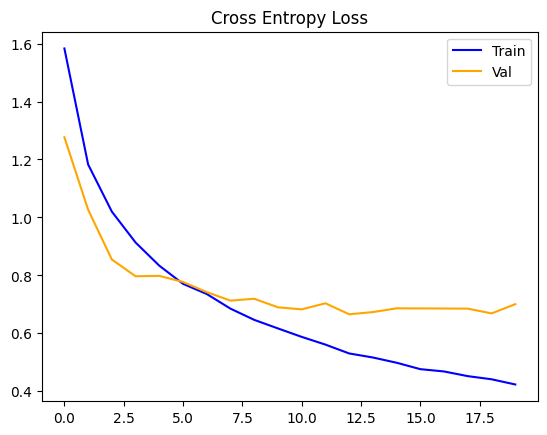

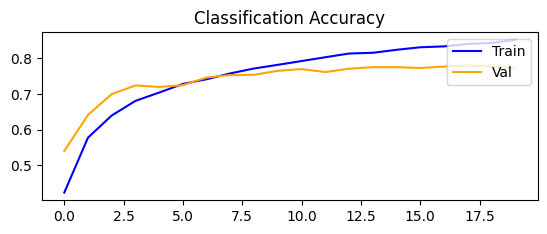

In [104]:
#visualising the metrics for train and validation data
plt.subplot(111)
plt.title('Cross Entropy Loss')
plt.plot(hist.history['loss'], color='blue') 
plt.plot(hist.history['val_loss'], color='orange')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(hist.history['accuracy'], color='blue')
plt.plot(hist.history['val_accuracy'], color='orange')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [67]:
model.evaluate(x_test, y_test_one_hot) # hence the accuracy of the model on test data is 76.5%

313/313 [==============================] - 1s 3ms/step - loss: 0.7348 - accuracy: 0.7652


[0.7348279356956482, 0.7652000188827515]

In [69]:
print(model.metrics_names) 

['loss', 'accuracy']


NOW WE TRY A SAMPLE IMAGE TO CHECK HOW THE MODEL PERFORMS ON A RANDOM INPUT

In [79]:
from skimage.transform import resize ## we need to resize the image for it to fit in the model

In [108]:
test_image = plt.imread(r"airplane.jpg")
test_image_resized = resize(test_image, (32,32,3))

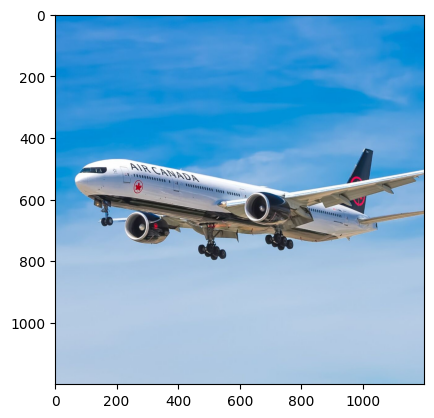

In [109]:
plt.imshow(test_image)

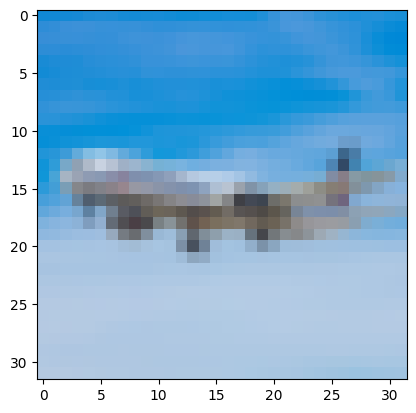

In [96]:
plt.imshow(test_image_resized)

In [97]:
predicted_test_image = model.predict(np.array([test_image_resized]))


1/1 [==============================] - 0s 30ms/step


In [98]:
predicted_test_image # will basically give us the probabilities of what the given image can be

array([[9.9995100e-01, 1.0277356e-07, 4.1786443e-05, 5.3726822e-06,
        2.1110301e-07, 2.2058970e-08, 1.3744362e-07, 1.1470873e-09,
        6.1291104e-08, 1.2346272e-06]], dtype=float32)

In [99]:
label_to_name_dict={0:'AIRPLANE',1:'AUTOMOBILE',2:'BIRD',3:'CAT',4:'DEER',5:'DOG',6:'FROG',7:'HORSE',8:'SHIP',9:'TRUCK'}


In [101]:
print("The maximum probabilityof the 10 probabilities is" ,np.max(predicted_test_image))
print("The index of the element with maximum probability is ",np.argmax(predicted_test_image))
print("Hence the given image corresponds to the label with index", np.argmax(predicted_test_image), "that is", label_to_name_dict[np.argmax(predicted_test_image)] )

The maximum probabilityof the 10 probabilities is 0.999951
The index of the element with maximum probability is  0
Hence the given image corresponds to the label with index 0 that is AIRPLANE
